In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from Maze import Maze

In [14]:
env = Maze()
state = env.reset()
done = False

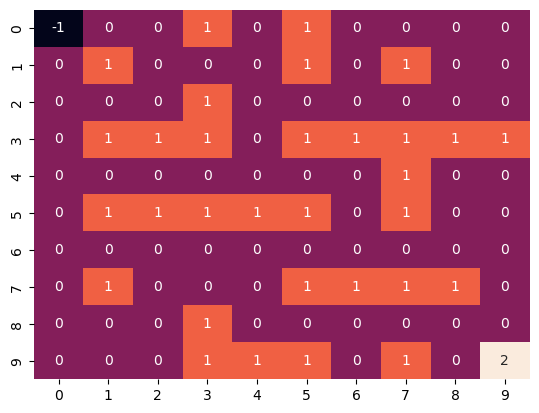

In [15]:
env.plot()

In [249]:
policy_probs = np.full((*env.maze.shape, 4), 0.25)

In [250]:
def policy(action):
    return policy_probs[action]

In [251]:
action_probabilities = policy((0, 0))
action_probabilities

array([0.25, 0.25, 0.25, 0.25])

In [252]:
state_values = np.zeros(env.maze.shape)

In [253]:
def value_iteration(policy_probs, state_values, theta = 1e-6, gamma = 0.99):
    delta = float("inf")

    while delta > theta:
        delta = 0
        
        for row in range(env.maze.shape[0]):
            for col in range(env.maze.shape[1]):
                old_v = state_values[(row, col)]
                action_probs = None
                max_qsa = float("-inf")
                
                for action in range(4):
                    next_step, reward, done = env.simulate([row, col], action)
                    qsa = reward + gamma * state_values[next_step[0], next_step[1]]
                    
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.0
                
                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs
                
                delta = max(delta, abs(max_qsa - old_v))                    

In [254]:
value_iteration(policy_probs, state_values)

In [255]:
state_values

array([[84.2942207 , 85.14567848, 86.00573683, 86.87448264, 87.75200367,
        86.87448363, 86.00573879, 85.1456814 , 84.29422459, 83.45128234],
       [85.14567848, 86.00573683, 86.87448264, 87.75200367, 88.63838854,
        87.75200465, 86.87448461, 86.00573976, 85.14568236, 84.29422554],
       [86.00573683, 85.14567946, 86.00573782, 88.63838854, 89.53372679,
        88.63838952, 87.75200563, 86.87448557, 86.00574072, 85.14568331],
       [86.87448264, 87.75200367, 88.63838854, 89.53372679, 90.43810887,
        91.35162611, 92.27437081, 86.00574072, 94.14791631, 95.09890636],
       [87.75200367, 88.63838854, 89.53372679, 90.43810887, 91.35162611,
        92.27437081, 93.20643616, 94.14791631, 95.09890636, 96.05950237],
       [88.63838854, 89.53372679, 90.43810887, 91.35162611, 92.27437081,
        93.20643616, 94.14791631, 95.09890636, 96.05950237, 97.02980137],
       [89.53372679, 90.43810887, 91.35162611, 92.27437081, 93.20643616,
        94.14791631, 95.09890636, 96.05950237

<AxesSubplot:>

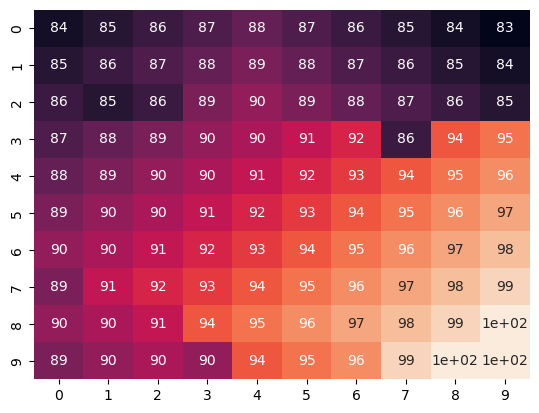

In [256]:
sns.heatmap(state_values, annot=True, cbar = False)

<AxesSubplot:>

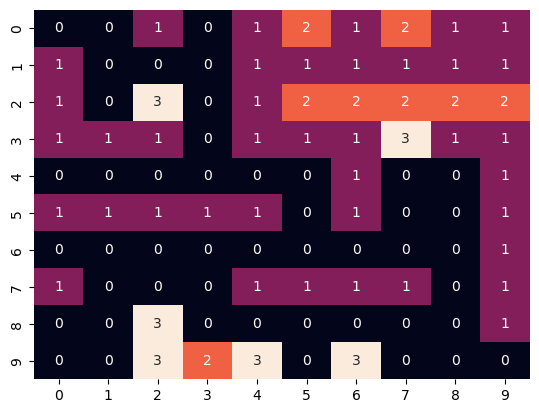

In [257]:
sns.heatmap(np.argmax(policy_probs, axis = 2), annot=True, cbar=False)

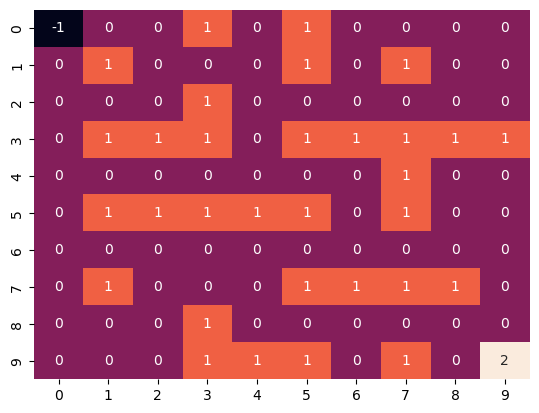

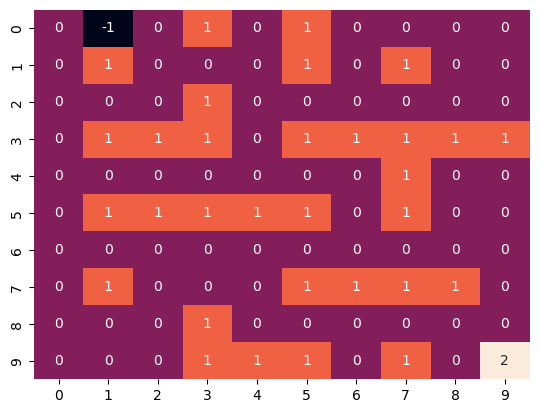

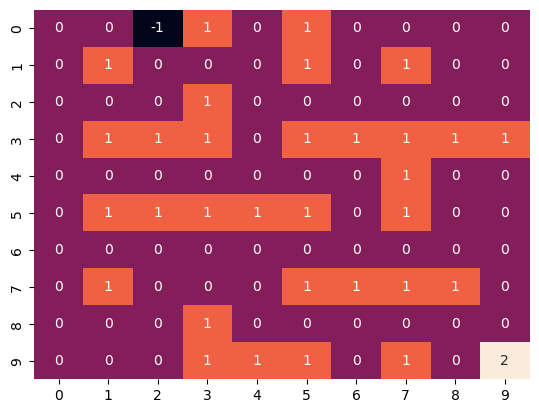

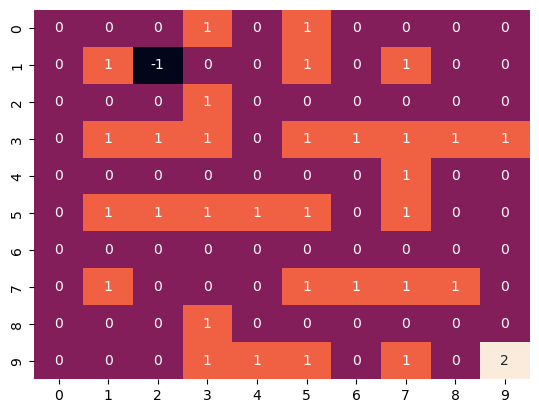

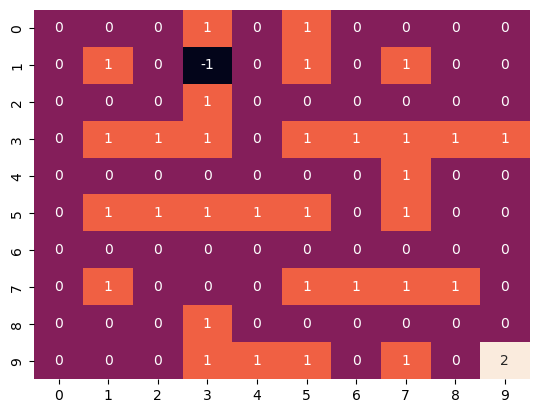

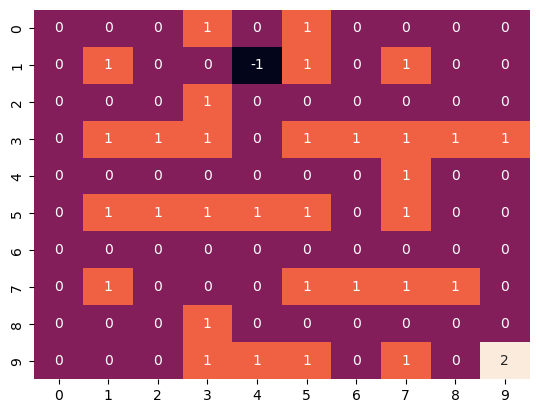

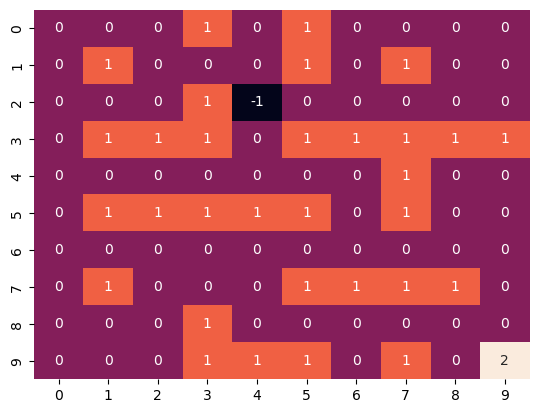

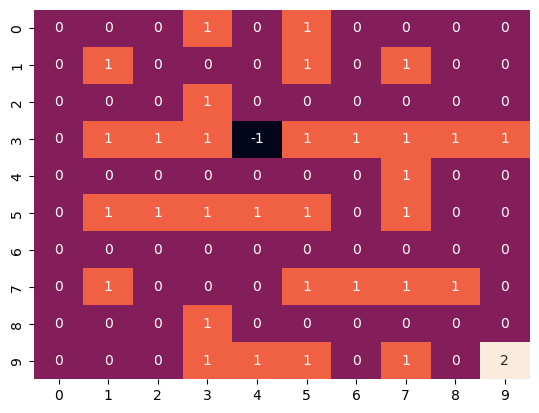

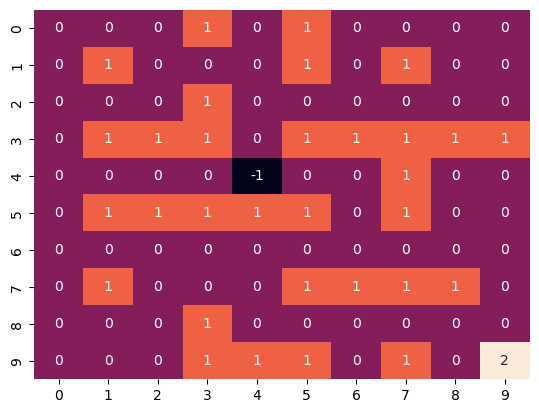

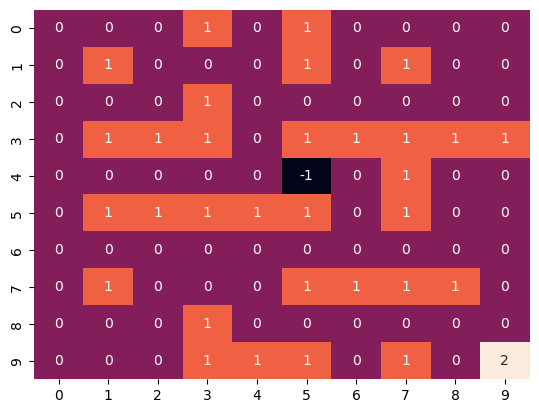

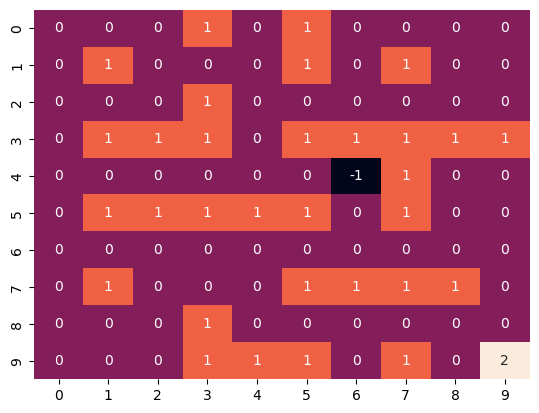

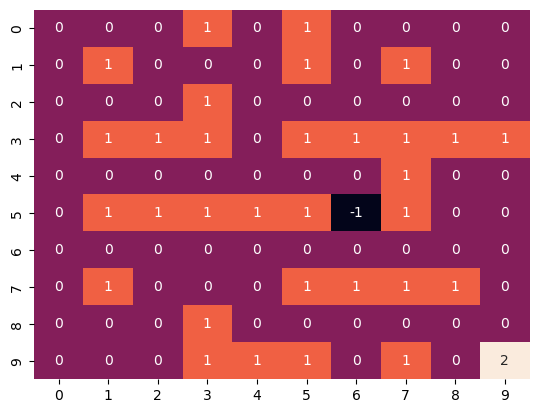

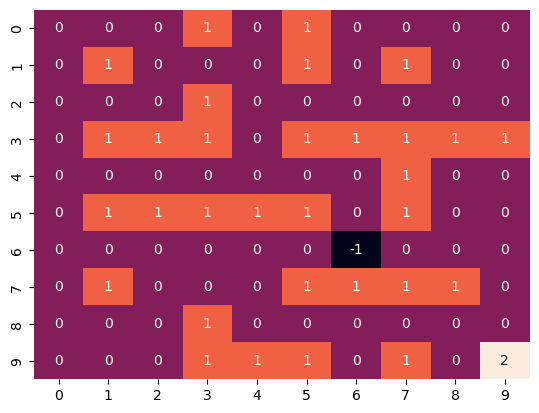

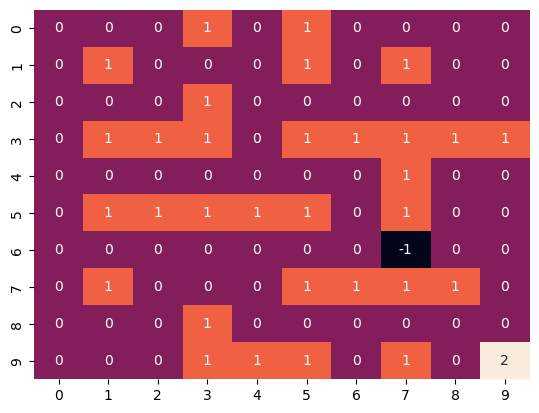

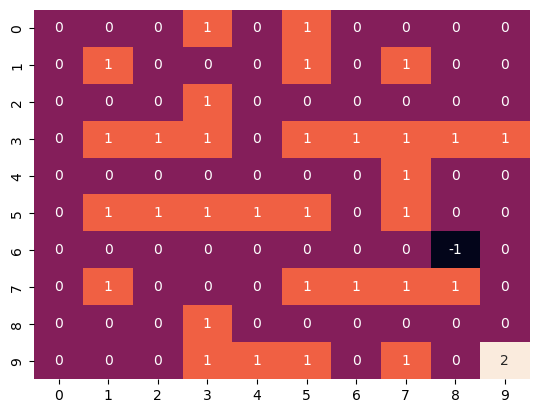

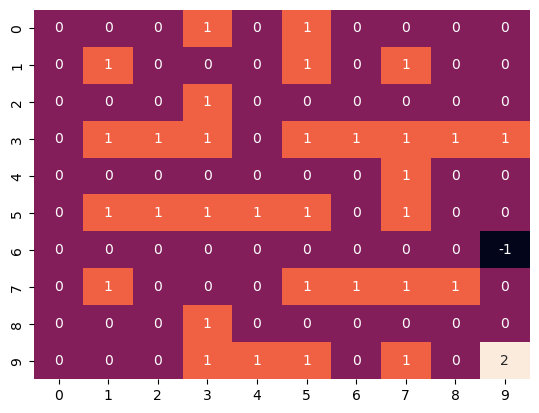

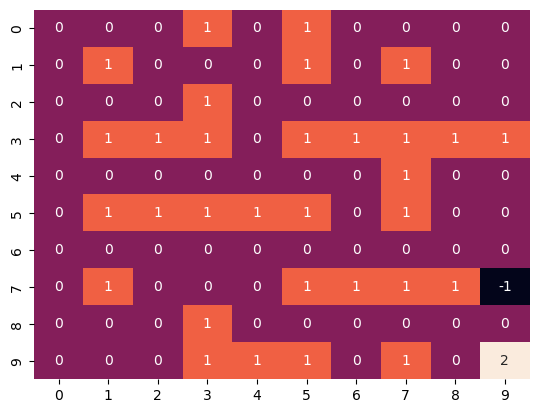

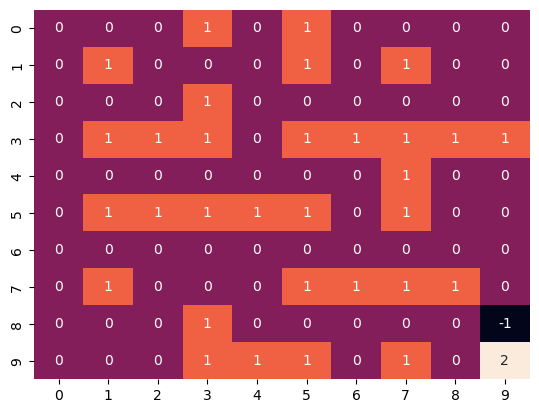

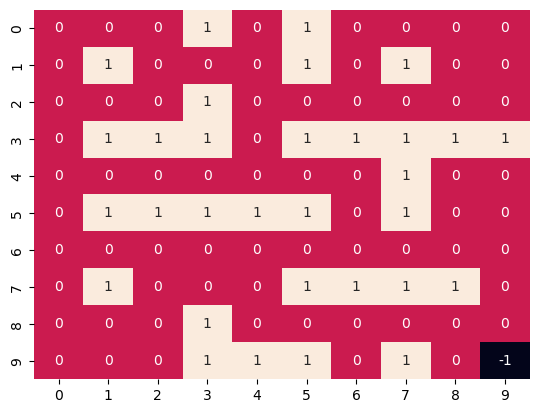

In [258]:
env.reset()
done = False

while done == False:
    env.plot()
    action = np.argmax(policy_probs[env.current_pos[0], env.current_pos[1]])
    _, _, done = env.step(action)
    
env.plot()